# The Dataset
The dataset contains the following information about 5783

loan_id: Unique loan identifier

monthly_income: borrower's monthly income

origination_score_band: score tier band at the moment of loan's origination

TOB_months: Age in months at the moment the loan entered early delinquency

closing_principal_balance: The loan's closing balance at the moment the loan entered early delinquency

original_loan_amount: The loan;s original amount

product: Product line (the portfolio has multiple products)

original_loan_term: The loan's original term in months

remaining_loan_term: The loan;s reamining in months at the moment the loan entered early delinquency

deliq_history: The loan;s previous 6 months of delinquency history at the momet the loan entered early delinquency.The value are separated by commas. The first value from left to right represents the most recent historical value(i.e. 1 month before entering early delinquency) The 2nd value from left to right represents the delinquency two months before early delinquency and so on) 1: 1-30 days delinquency. 2: 31-60 days delinquency and so on

target: Indicate whether the loan rolled forward into later stage delinquency or not (1: rolled, 0: not rolled)


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.linear_model  as lr
import sklearn.model_selection as data_test_split
import matplotlib.pyplot as plt

In [8]:
Data = pd.read_csv('dataset_risk_analytics.csv')

In [9]:
Data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


In [10]:
Data.head()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0


In [11]:
Data.shape

(5783, 11)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    5783 non-null   int64  
 1   monthly_income             5406 non-null   float64
 2   origination_score_band     5783 non-null   int64  
 3   TOB_months                 5406 non-null   float64
 4   closing_principal_balance  5406 non-null   float64
 5   original_loan_amount       5406 non-null   float64
 6   product                    5783 non-null   object 
 7   original_loan_term         5783 non-null   int64  
 8   remaining_loan_term        5783 non-null   int64  
 9   delq_history               5406 non-null   object 
 10  target                     5783 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 497.1+ KB


In [13]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,5783.0,3625.042711,1516.292643,1000.0,2310.5,3623.0,4934.5,6249.0
monthly_income,5406.0,14314.372919,13799.514988,750.0,6000.0,9750.0,17250.0,99750.0
origination_score_band,5783.0,3.904029,1.490877,1.0,3.0,4.0,5.0,8.0
TOB_months,5406.0,28.385683,16.357494,6.0,17.0,24.0,38.0,83.0
closing_principal_balance,5406.0,5714.391417,7837.483534,100.0,1380.0,3000.0,6800.0,88200.0
original_loan_amount,5406.0,6630.701073,8491.265603,100.0,1800.0,3750.0,8100.0,90000.0
original_loan_term,5783.0,62.023517,23.774170,12.0,60.0,60.0,60.0,192.0
remaining_loan_term,5783.0,39.618364,25.004423,0.0,23.0,40.0,51.0,177.0
target,5783.0,0.302092,0.459205,0.0,0.0,0.0,1.0,1.0


In [14]:
Data.nunique()

loan_id                      5250
monthly_income                 56
origination_score_band          8
TOB_months                     72
closing_principal_balance     350
original_loan_amount          347
product                         4
original_loan_term             22
remaining_loan_term            94
delq_history                   55
target                          2
dtype: int64

In [15]:
Data.isnull().any(axis=0)

loan_id                      False
monthly_income                True
origination_score_band       False
TOB_months                    True
closing_principal_balance     True
original_loan_amount          True
product                      False
original_loan_term           False
remaining_loan_term          False
delq_history                  True
target                       False
dtype: bool

In [16]:
Data.isnull().sum()

loan_id                        0
monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
delq_history                 377
target                         0
dtype: int64

In [17]:
# dealing with numeric null values to means and objects to 0

Data = Data.fillna({
    'monthly_income' : Data['monthly_income'].mean(),
    'TOB_months': Data['TOB_months'].mean(),
    'closing_principal_balance': Data['closing_principal_balance'].mean(),
    'original_loan_amount': Data['original_loan_amount'].mean(),
    'delq_history': '0,0,0,0,0,0',  
})

Data.isnull().sum() # replacing null values with the mean(for int./float)

loan_id                      0
monthly_income               0
origination_score_band       0
TOB_months                   0
closing_principal_balance    0
original_loan_amount         0
product                      0
original_loan_term           0
remaining_loan_term          0
delq_history                 0
target                       0
dtype: int64

# EDA Univariant Analysis

In [18]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    

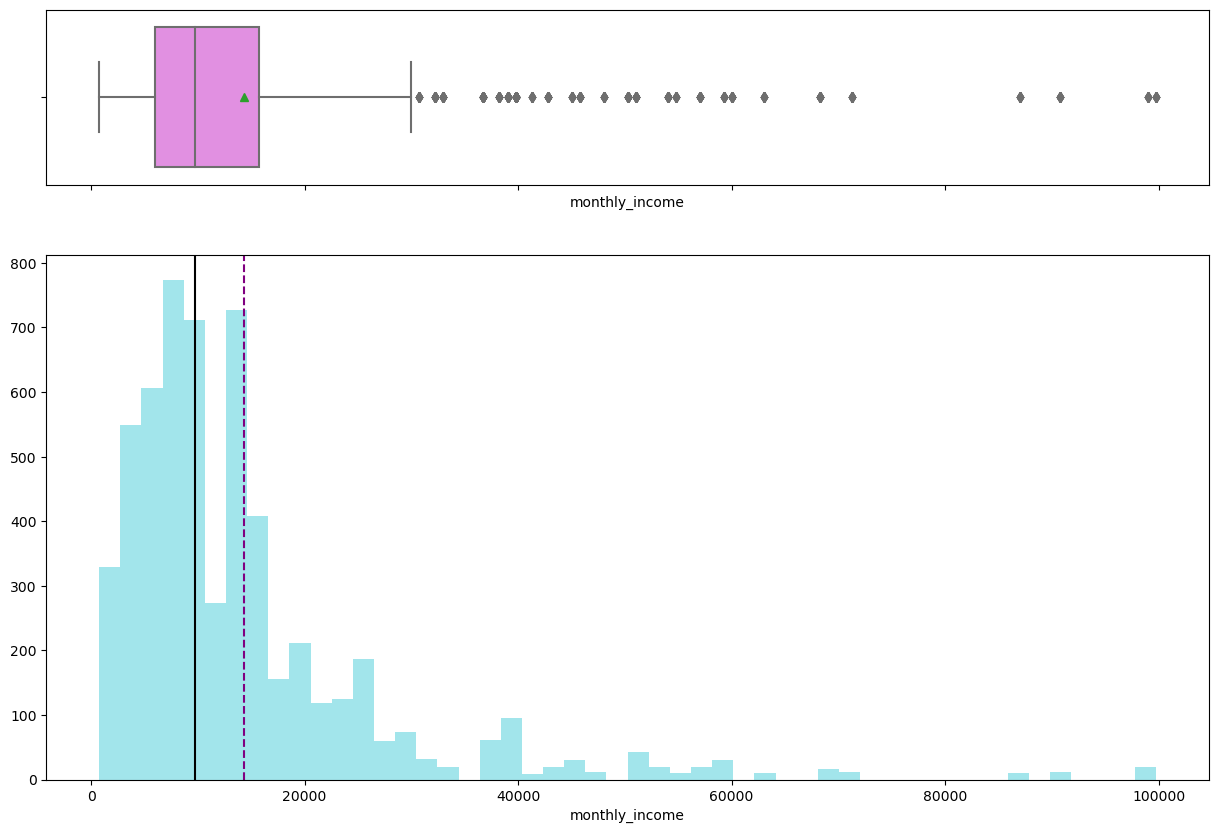

In [19]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["monthly_income"])

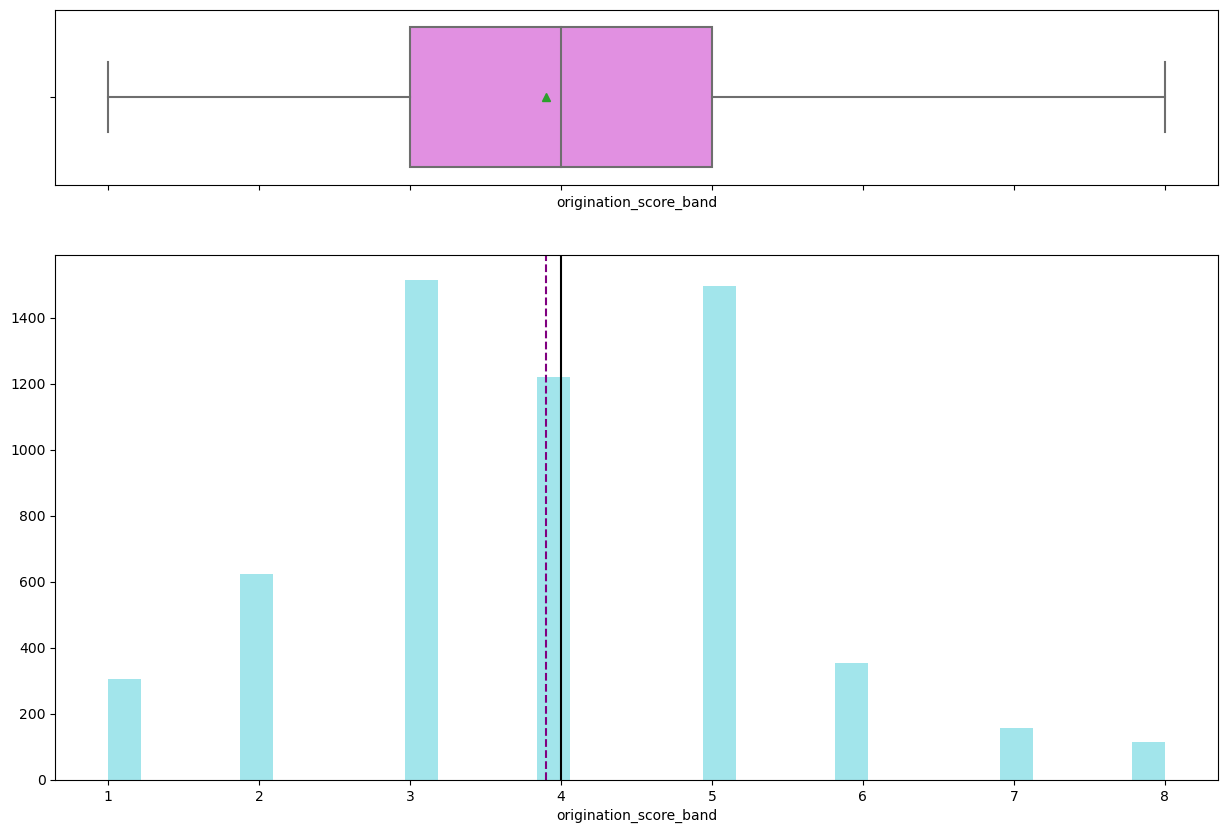

In [20]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["origination_score_band"])

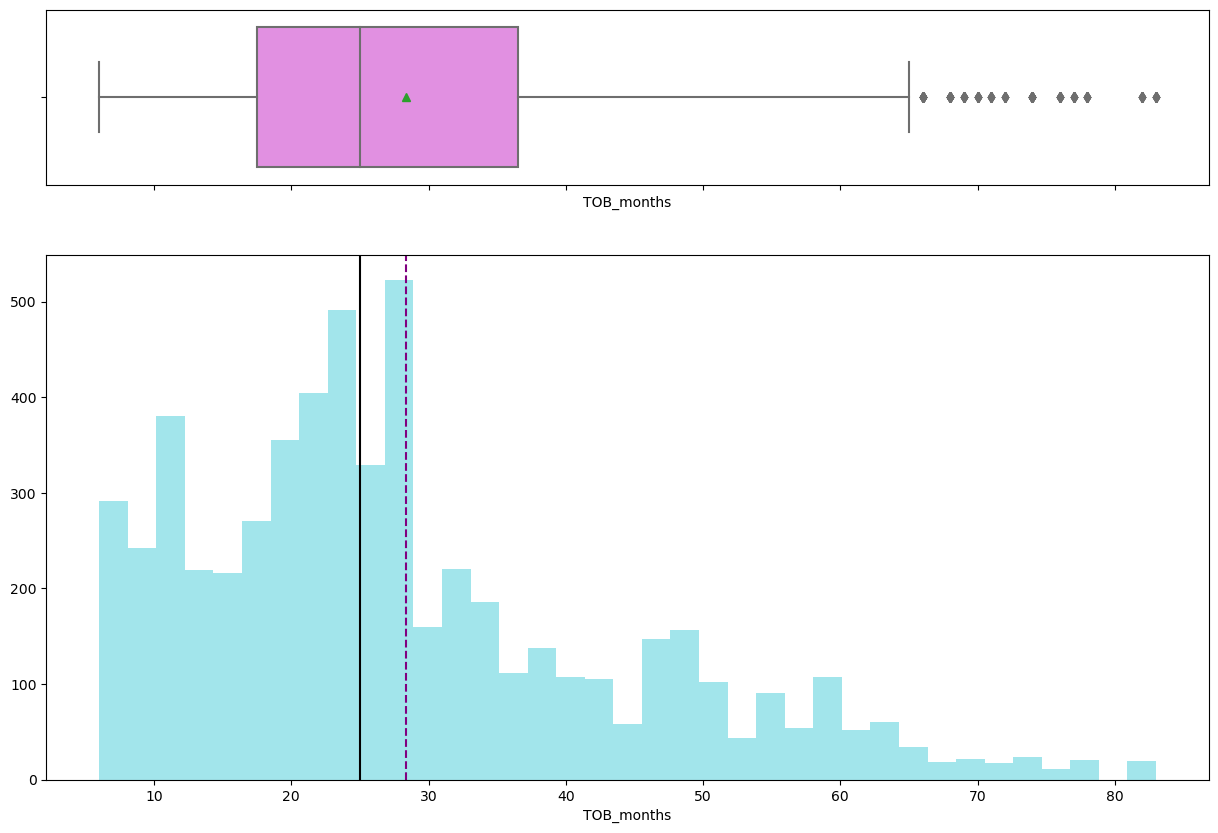

In [21]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["TOB_months"])

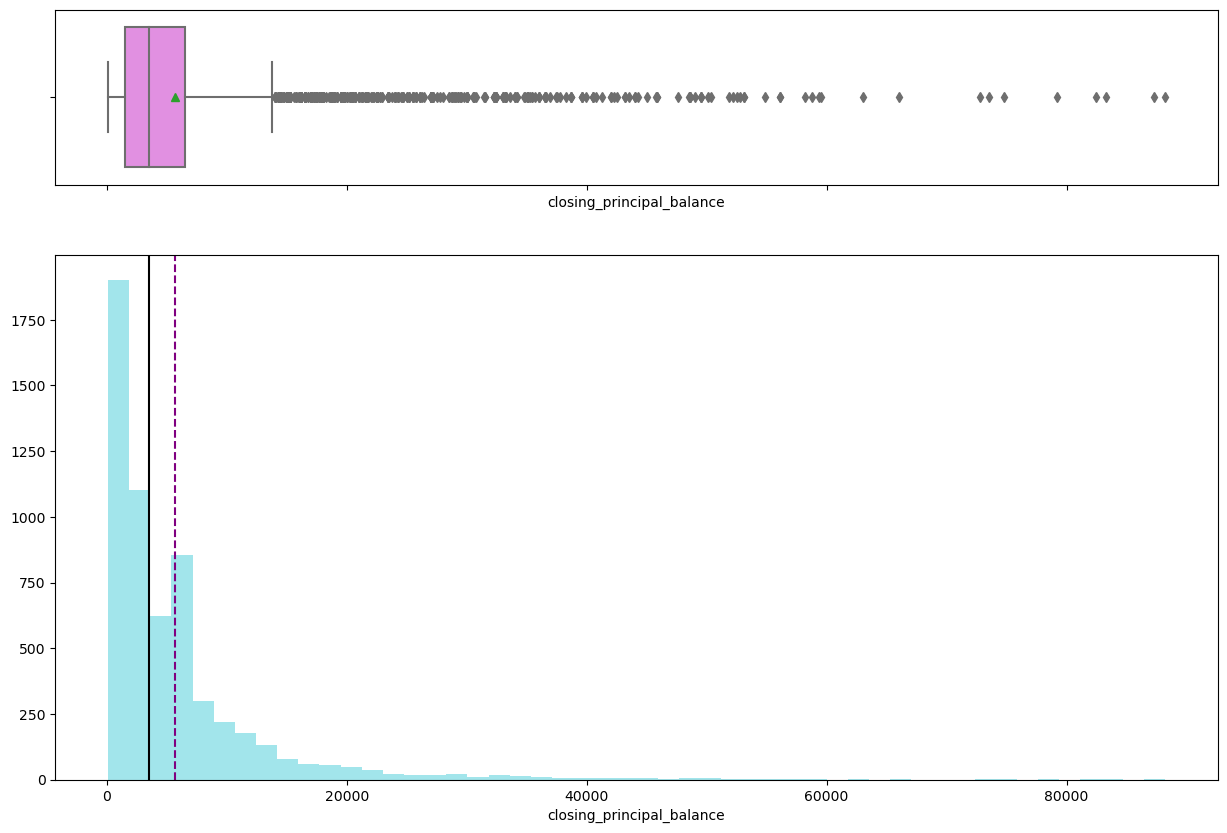

In [22]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["closing_principal_balance"])

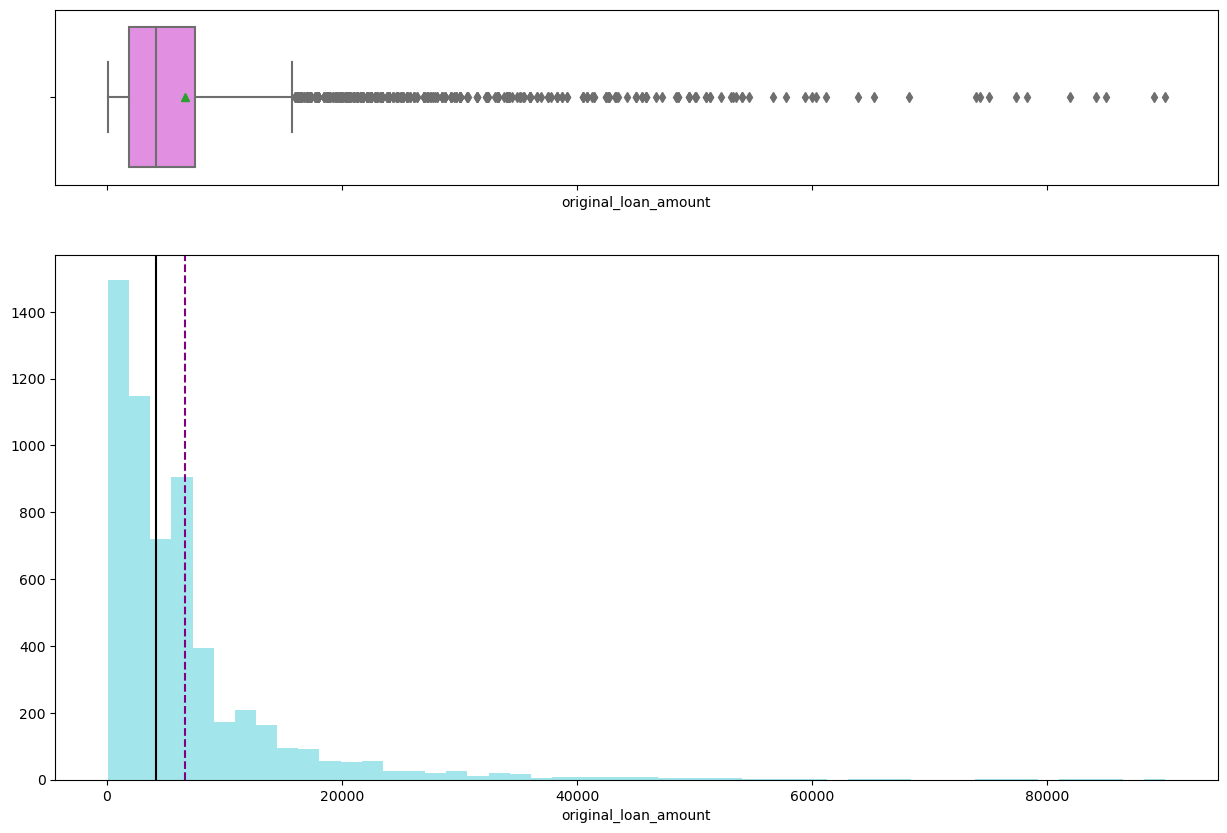

In [23]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["original_loan_amount"])

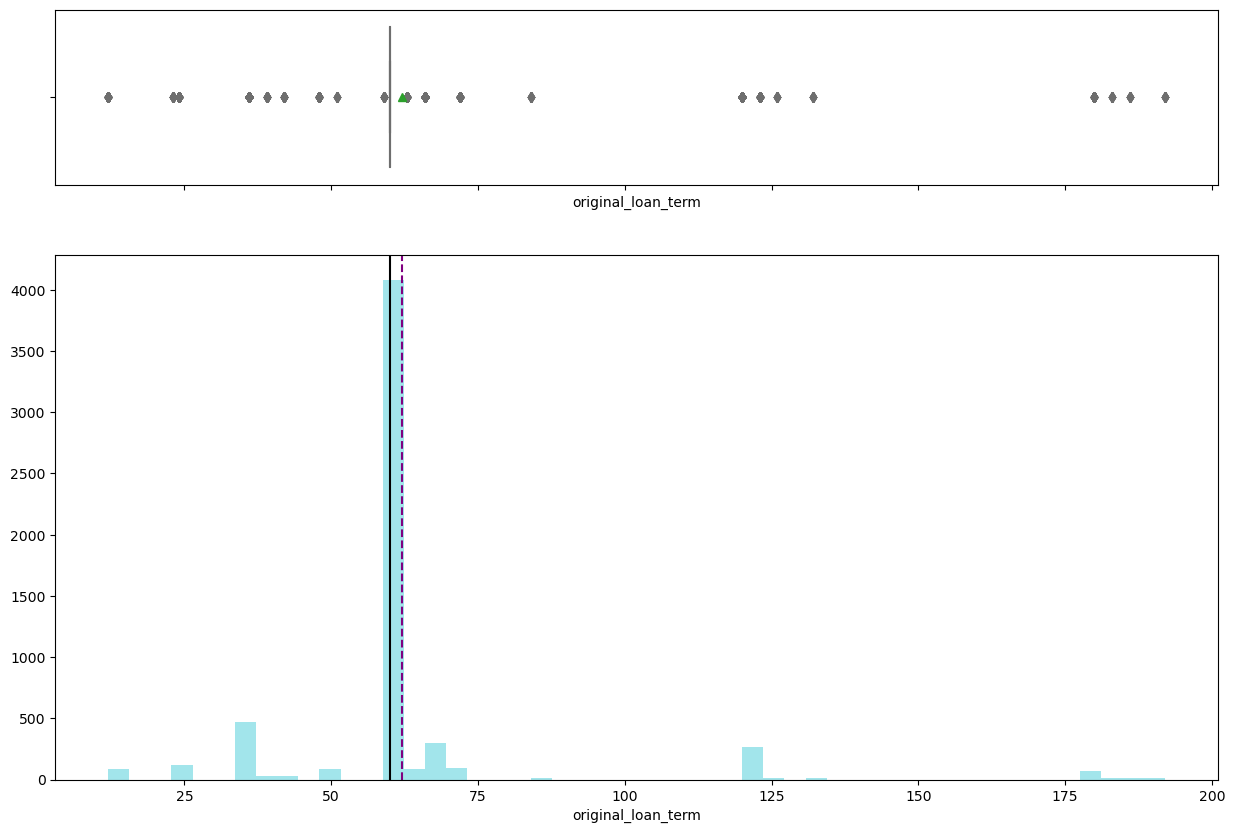

In [24]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["original_loan_term"])

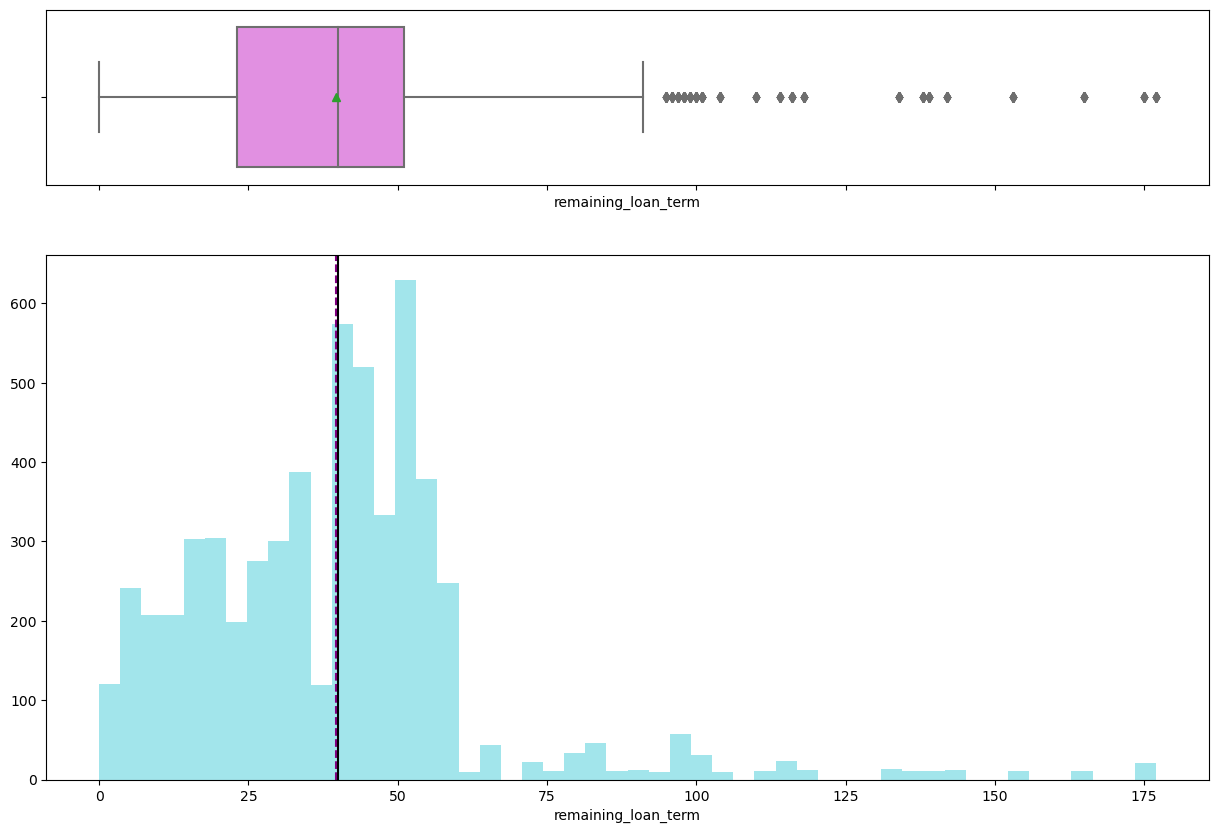

In [25]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["remaining_loan_term"])

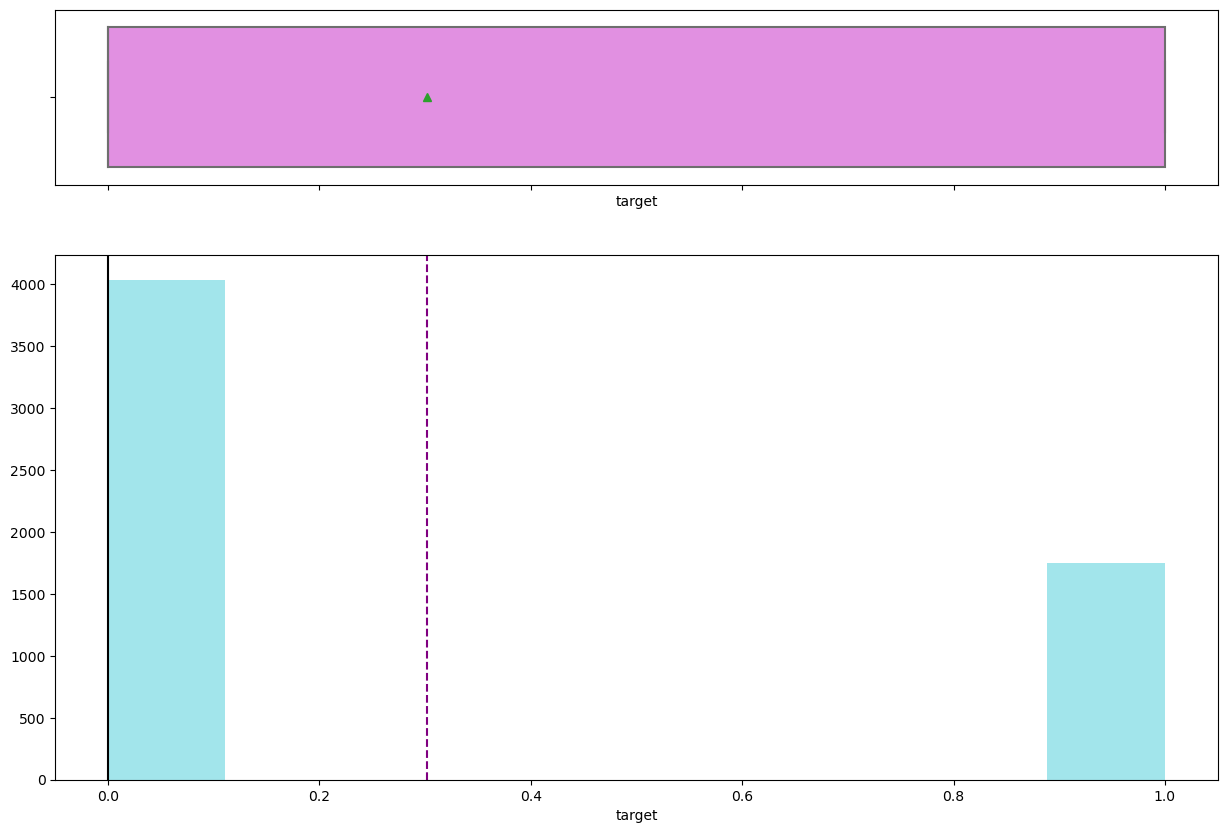

In [26]:
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore")
histogram_boxplot(Data["target"])

# Bi-Variant Analysis

<AxesSubplot:>

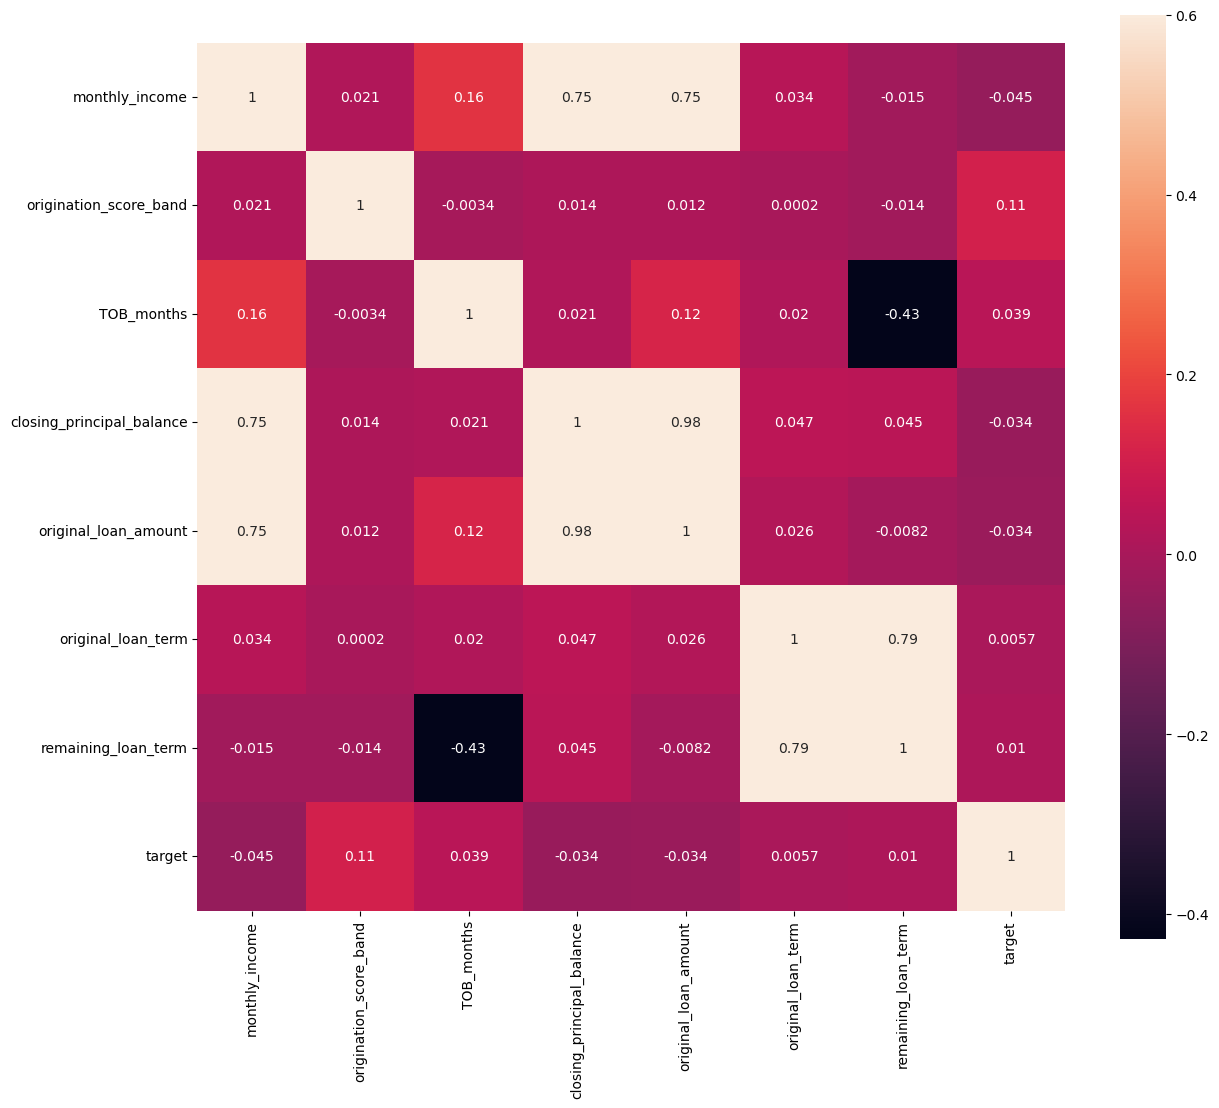

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(Data.drop('loan_id',axis=1).corr(), vmax=0.6, square= True, annot=True)

In [28]:
Loan = Data.iloc[:,:].values
Loan

array([[1000, 6000.0, 5, ..., 5, '0,0,0,0,0,0', 0],
       [1001, 39000.0, 5, ..., 42, '0,1,0,0,0,0', 0],
       [1002, 18000.0, 5, ..., 46, '0,0,1,0,0,0', 0],
       ...,
       [6247, 3750.0, 5, ..., 65, '0,0,0,0,0,0', 0],
       [6248, 9750.0, 7, ..., 65, '0,0,0,0,0,0', 1],
       [6249, 2250.0, 6, ..., 35, '0,0,0,0,0,0', 0]], dtype=object)

In [29]:
#list categorical data, i.e to give the texts numbers, i.e product in text has to be encoded and changed into numbers
list_cat = Data[['product', 'target']]
list_cat

,product,target
0,B,0
1,B,0
2,B,0
3,B,1
4,B,0
...,...,...
5778,A,0
5779,C,0
5780,D,0
5781,D,1


In [30]:
from sklearn.preprocessing import LabelEncoder 
new_prod = LabelEncoder()
record = new_prod.fit_transform(Loan[:,6])
Data['product1'] = record
Data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target,product1
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0,1
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0,1
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0,1
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1,1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0,0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0,2
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0,3
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1,3


# Converting the categories to the label encoder

In [31]:
#using If statement to group remaining_loan_term values
def group_rl_term (x):
    if x > 0 and x <= 20:
        return 0
    elif x > 20 and x <= 40:
        return 1
    elif x > 40 and x <= 60:
        return 2
    elif x > 60 and x <= 80:
        return 3
    else:
        return 4

group_rl_term(80)

3

In [32]:
#using If statement to group original_loan_term values

def group_ol_term (x):
     if x > 0 and x <= 20:
        return 0
     elif x > 20 and x <= 40:
        return 1
     elif x > 40 and x <= 60:
        return 2
     elif x > 60 and x <= 80:
        return 3
     else:
        return 4

group_ol_term(100)

4

In [33]:
# checking the columns after grouping 

Data['rl_term'] = Data.remaining_loan_term.apply(group_rl_term)
Data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target,product1,rl_term
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0,1,0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0,1,2
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0,1,2
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1,1,2
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0,0,1
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0,2,0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0,3,3
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1,3,3


In [34]:
# checking the columns after grouping 
Data['ol_term'] = Data.original_loan_term.apply(group_ol_term)
Data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target,product1,rl_term,ol_term
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0,1,0,1
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0,1,2,2
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0,1,2,2
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1,1,2,2
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0,0,1,1
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0,2,0,0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0,3,3,2
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1,3,3,2


# Building our models



# Let's make the data splits

In [35]:
# preparing data for split

y = Data.target.values
X = Data.drop(['loan_id','delq_history','product','original_loan_term','remaining_loan_term','target'], axis='columns')

In [36]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
#inspecting values
X

,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product1,rl_term,ol_term
0,6000.0,5,83.0,300.0,1800.0,1,0,1
1,39000.0,5,82.0,7200.0,11700.0,1,2,2
2,18000.0,5,78.0,2700.0,5400.0,1,2,2
3,23250.0,3,76.0,3900.0,6900.0,1,2,2
4,12000.0,3,74.0,2100.0,3600.0,1,2,2
...,...,...,...,...,...,...,...,...
5778,8250.0,4,6.0,6000.0,6000.0,0,1,1
5779,2250.0,5,6.0,1500.0,1500.0,2,0,0
5780,3750.0,5,6.0,3000.0,3000.0,3,3,2
5781,9750.0,7,6.0,7500.0,7500.0,3,3,2


In [38]:
# splitting data into training set and testing set
from sklearn.model_selection import train_test_split

# Spliting data to train set and test set... keep 20% (0.2) to test, then 80%(0.8) for train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(4626, 8) (4626,) (1157, 8) (1157,)


In [39]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (4626, 8)
X_test (1157, 8)
y_train (4626,)
y_test (1157,)


In [40]:
X_train.head()


,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product1,rl_term,ol_term
1571,15000.0,1,24.0,1400.0,1500.0,3,2,2
2477,11250.0,5,46.0,6800.0,9350.0,1,0,2
1625,2250.0,3,20.0,100.0,200.0,2,1,2
1804,9750.0,3,35.0,8100.0,9000.0,1,1,2
3497,9000.0,3,56.0,2000.0,2250.0,0,0,2


In [41]:
# Machine Learning
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from time import time

In [42]:
# Applying k-Fold Cross Validation to evaluate the model
def k_fold(model,X_train,y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print('K-Fold cross validation mean:',accuracies.mean())
    print('K-Fold cross validation std:',accuracies.std())

In [43]:
# LogisticRegression classifier
def logistic_classifier(features, labels, **kwargs):
    ''' a function of logistic regression that will fit the classier to the data,
    make prediction and print a classification report'''
    
    print('==================================')
    print('Fitting logistic classifier')
    print('==================================')
    
    # instantiate model
    model_1 = LogisticRegression(random_state=0)
    
    # train model
    start = time()
    model_1.fit(features, labels)
    end = time()
    
    # Training time
    print('Training time:',end-start)
    
    # Making predictions
    y_pred = model_1.predict(X_test)
    
    # get a sense of performance
    accuracy_1 = classification_report(y_test,y_pred)
    print('Accuracy:',accuracy_1)
    
    cm = confusion_matrix(y_test,y_pred, labels=[1,0])
    print('Confusion matrix:')
    print(cm)
    cm = confusion_matrix(y_test,y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    
    k_fold(model_1,features,labels)
    

    
    return model_1

In [44]:
# RandomForest classifier
def random_forest_classifier(features, labels, **kwargs):
    ''' a function of Random Forest that will fit the classier to the data,
    make prediction and print a classification report'''  
    
    print('==================================')
    print('Fitting RandomForest c')
    print('==================================')
    
    # instantiate model
    model_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    
    # train model
    start = time()
    model_2.fit(features, labels) 
    end = time()
    
    # Training time
    print('Training time:',end-start)  
    # Making prediction
    
    y_pred = model_2.predict(X_test)
    
    # get a  sense of performance
    accuracy_2 = classification_report(y_test,y_pred)
    print('Accuracy:',accuracy_2)
    
    cm = confusion_matrix(y_test,y_pred, labels=[1,0])
    print('Confusion matrix:')
    print(cm)
    cm = confusion_matrix(y_test,y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    
    k_fold(model_2,features,labels)

    
    return model_2
    
 

In [45]:
# Decision tree classifier
def decision_tree_classifier(features, labels, **kwargs):
    ''' a function of xgboost that will fit the classier to the data,
    make prediction and print a classification report'''  
    
    print('==================================')
    print('Decision classfier classifier')
    print('==================================')
    
    # instantiate model
    model_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    
    # train model
    start = time()
    model_3.fit(features, labels) 
    end = time()
       
    # Training time
    print('Training time:',end-start) 
    
    # Making prediction
    y_pred = model_3.predict(X_test)
    
    # get a sense of performance
    accuracy_3 = classification_report(y_test,y_pred)
    print('Decision tree accuracy:',accuracy_3)
    
    cm = confusion_matrix(y_test,y_pred, labels=[1,0])
    print('Confusion matrix:')
    print(cm)
    cm = confusion_matrix(y_test,y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    
    k_fold(model_3,features,labels)
    
    return model_3

# Logistic Regression

Fitting logistic classifier
Training time: 0.06127357482910156
Accuracy:               precision    recall  f1-score   support

           0       0.70      1.00      0.82       806
           1       0.00      0.00      0.00       351

    accuracy                           0.70      1157
   macro avg       0.35      0.50      0.41      1157
weighted avg       0.49      0.70      0.57      1157

Confusion matrix:
[[  0 351]
 [  0 806]]
K-Fold cross validation mean: 0.6980122109711742
K-Fold cross validation std: 0.0011081408265391315


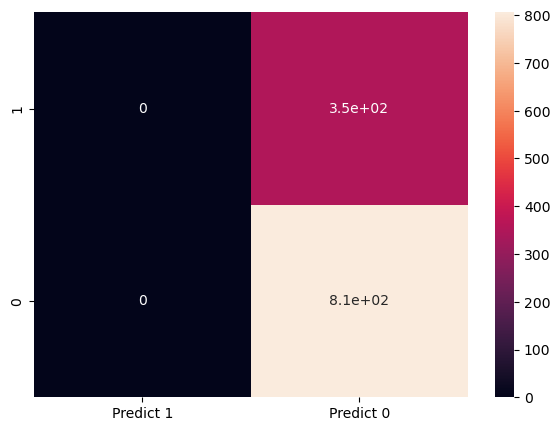

In [46]:
model_a = logistic_classifier(X_train,y_train)


# Random Forest

Fitting RandomForest c
Training time: 0.07463645935058594
Accuracy:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       806
           1       0.92      0.79      0.85       351

    accuracy                           0.91      1157
   macro avg       0.92      0.88      0.89      1157
weighted avg       0.91      0.91      0.91      1157

Confusion matrix:
[[277  74]
 [ 25 781]]
K-Fold cross validation mean: 0.9236977924882892
K-Fold cross validation std: 0.015008137720604659
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


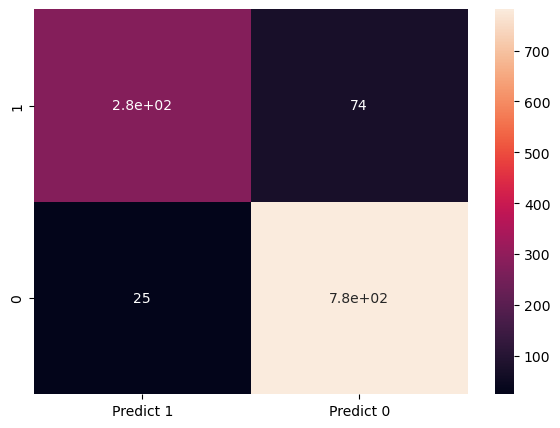

In [47]:
model_b = random_forest_classifier(X_train,y_train)
print(model_b)

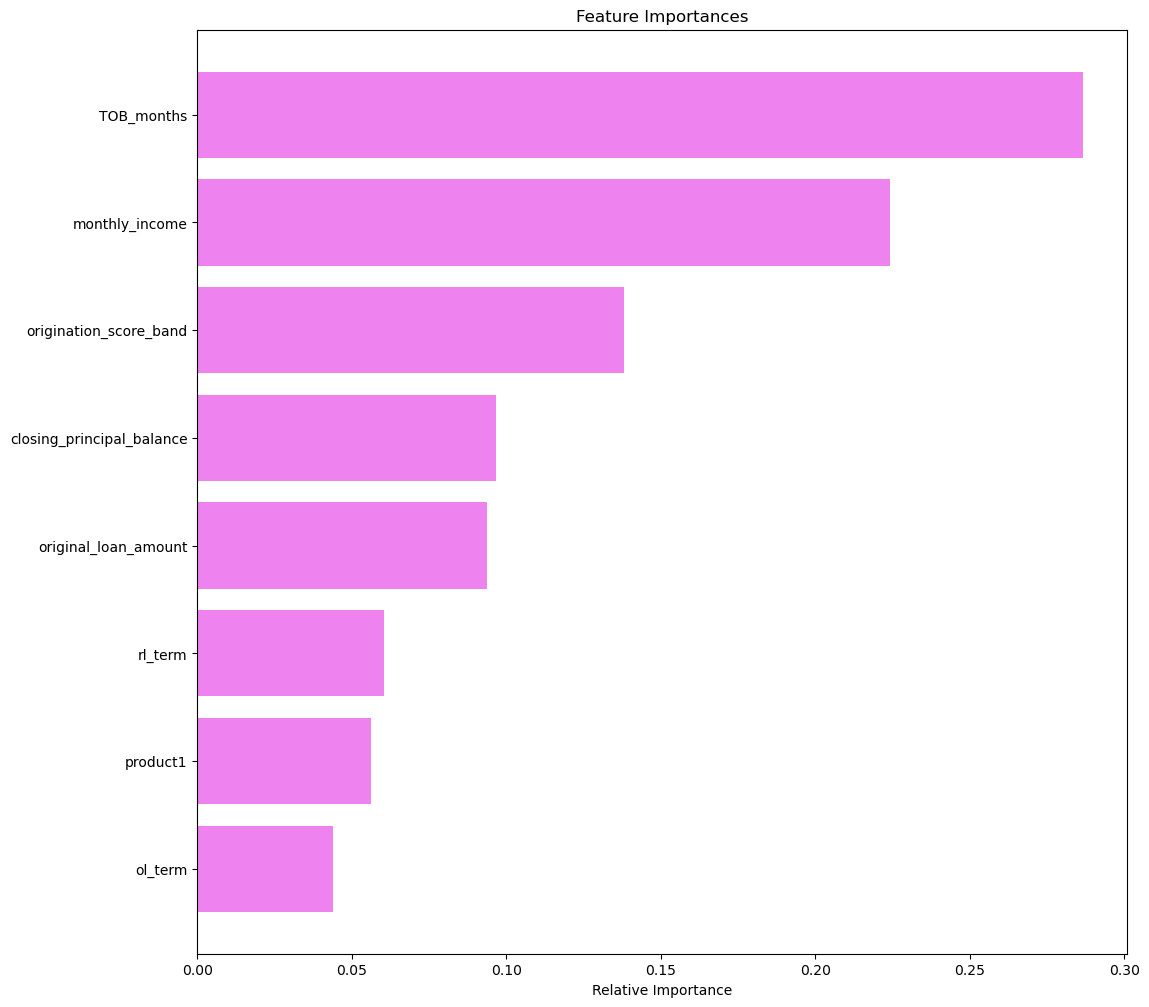

In [48]:
importances = model_b.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Decision classfier classifier
Training time: 0.0198361873626709
Decision tree accuracy:               precision    recall  f1-score   support

           0       0.96      0.98      0.97       806
           1       0.96      0.91      0.93       351

    accuracy                           0.96      1157
   macro avg       0.96      0.95      0.95      1157
weighted avg       0.96      0.96      0.96      1157

Confusion matrix:
[[321  30]
 [ 15 791]]
K-Fold cross validation mean: 0.965196862173104
K-Fold cross validation std: 0.006155060445743453
DecisionTreeClassifier(criterion='entropy', random_state=0)


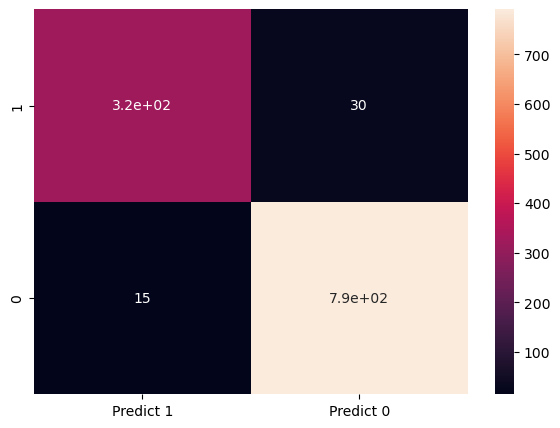

In [49]:
model_c = decision_tree_classifier(X_train,y_train)
print(model_c)

# Decision Tree

Decision classfier classifier
Training time: 0.0174560546875
Decision tree accuracy:               precision    recall  f1-score   support

           0       0.96      0.98      0.97       806
           1       0.96      0.91      0.93       351

    accuracy                           0.96      1157
   macro avg       0.96      0.95      0.95      1157
weighted avg       0.96      0.96      0.96      1157

Confusion matrix:
[[321  30]
 [ 15 791]]
K-Fold cross validation mean: 0.965196862173104
K-Fold cross validation std: 0.006155060445743453
DecisionTreeClassifier(criterion='entropy', random_state=0)


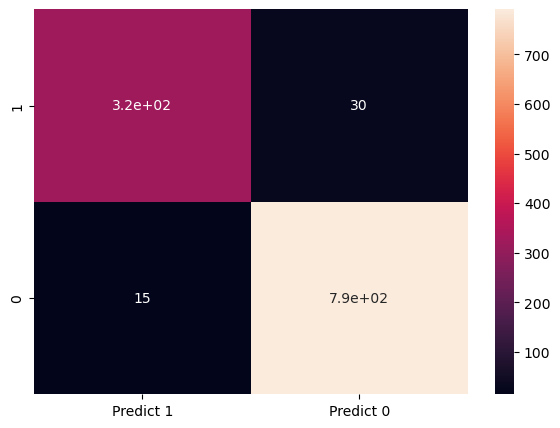

In [50]:
model_c = decision_tree_classifier(X_train,y_train)
print(model_c)

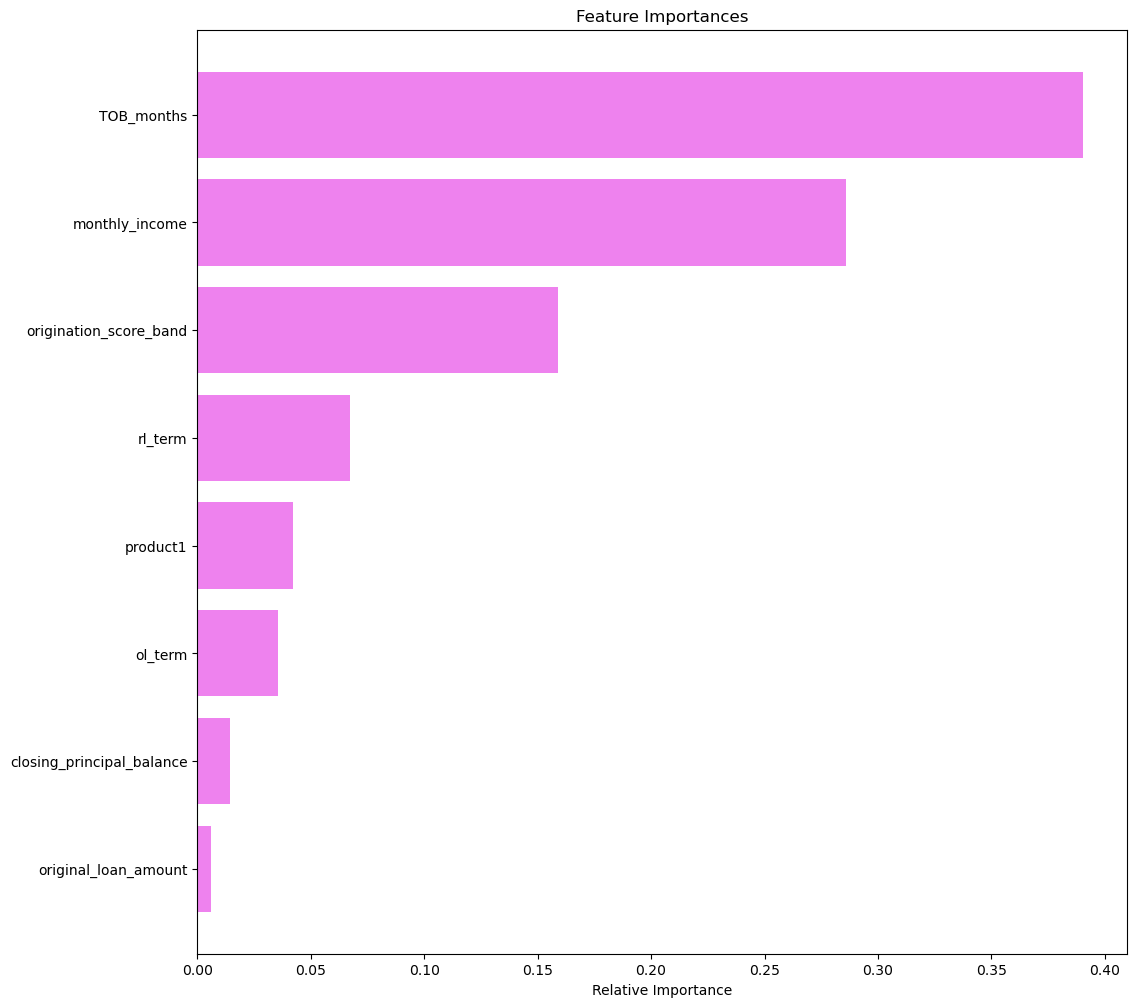

In [51]:
importances = model_c.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

76.72

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

69.82

In [54]:
coeff_data = pd.DataFrame(X.columns.delete(0))
coeff_data.columns = ['Feature']
coeff_data['Correlation'] = pd.Series(logreg.coef_[0])
coeff_data.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
5,rl_term,0.009679
4,product1,0.000003
3,original_loan_amount,-0.000004
0,origination_score_band,-0.000014
2,closing_principal_balance,-0.003990
6,ol_term,-0.049839
1,TOB_months,-0.060817


In [55]:
decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

78.34

In [56]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.31

In [57]:
pred_values = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.31
3,Decision Tree,78.34
0,KNN,76.72
1,Logistic Regression,69.82
